### DecisionTree_Assignment

### Predicting Survival in the Titanic Data Set

In [96]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report

Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(Url)

#titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

 
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
#(Parents/children aboard), and Fare to predict whether a passenger
#survived.

In [97]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

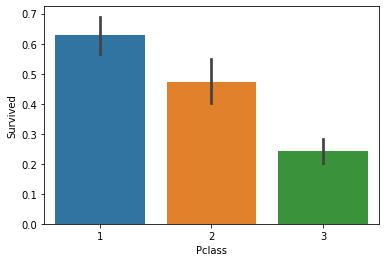

In [101]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=titanic)

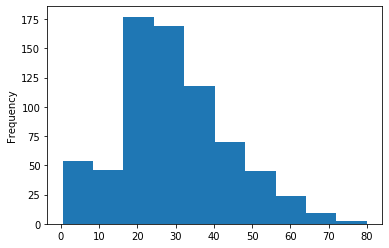

In [102]:
titanic.Age.plot.hist()

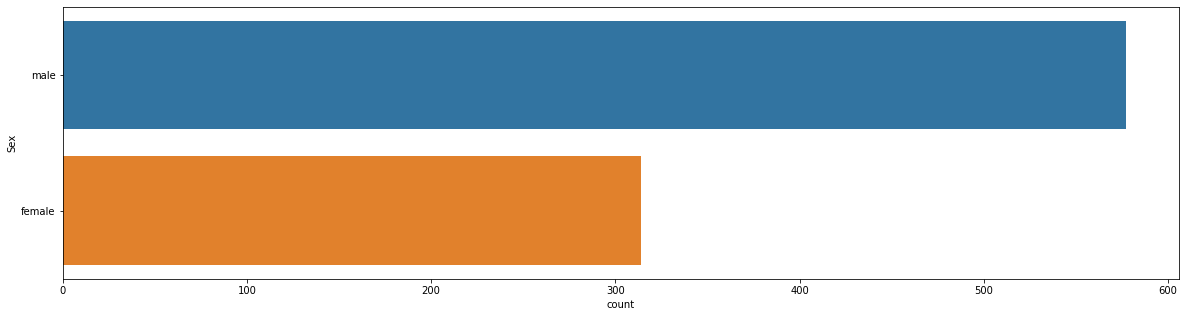

In [103]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',  data=titanic);

In [108]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [ ]:
X=X.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [113]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [107]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [114]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [115]:
X['Age'].fillna(X_train['Age'].mean(), inplace=True)

In [116]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [119]:
X['Sex']=np.where(X['Sex'] == 'female',1,0)

In [120]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [121]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.33, random_state=42)

In [122]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x, train_y)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
Y_pred = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)

In [127]:
acc_decision_tree

97.99

We have achieved a score of 97% accuracy